In [1]:
import numpy as np

In [2]:
import math
import matplotlib.pyplot as plt

In [3]:
def simulate_yield_costs(cap, offers, co, cu, iters, prob):
    overage = 0 
    underage = 0
    for t in range(iters):
        yld = offers - np.random.binomial(offers, prob)
        if yld > cap:
            overage += (yld - cap) * co
        if yld < q:
            underage += (cap - yld) * cu
    overage = overage / (iters + 1 - 1.0)
    underage = underage / (iters + 1 - 1.0)
    costs = np.array([overage, underage])
    return costs

In [4]:

int_length = 30
T = 10000
p = 0.15
co = 100
cu = 8

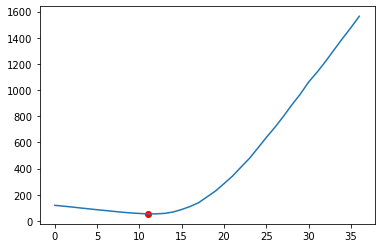

In [5]:
q = 100
int_length = int(q * p / (1 - p)) + 20

values = np.arange(q, q + int_length)
avg_costs = np.empty(int_length)
avg_overage = np.empty(int_length)
avg_underage = np.empty(int_length)

for qhat in values: 
    costs = simulate_yield_costs(q, qhat, co, cu, T, p)
    avg_costs[qhat - q] = costs[0] + costs[1]
    avg_overage[qhat - q] = costs[0]
    avg_underage[qhat - q] = costs[1]
    
optval = np.argmin(avg_costs)
opt = avg_costs[optval]

plt.scatter([optval], [opt], color = 'red')
plt.plot(np.arange(int_length), avg_costs)
plt.show()



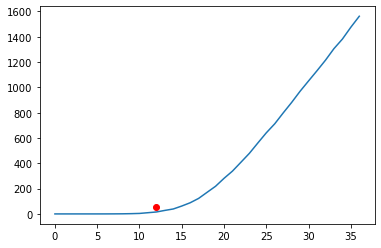

In [7]:
plt.scatter([optval], [opt], color = 'red')
plt.plot(np.arange(int_length), avg_overage)
plt.show()

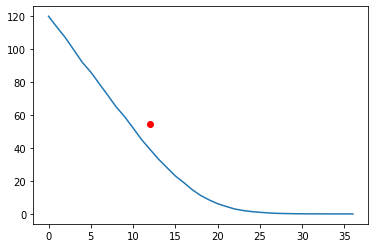

In [8]:
plt.scatter([optval], [opt], color = 'red')
plt.plot(np.arange(int_length), avg_underage)
plt.show()

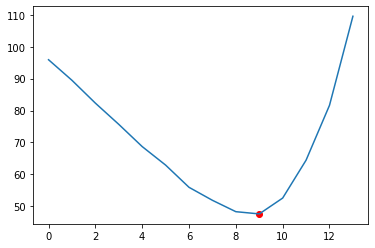

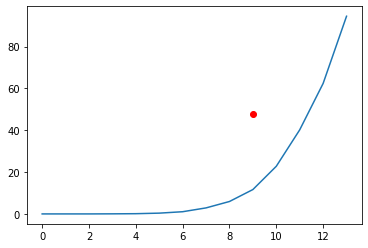

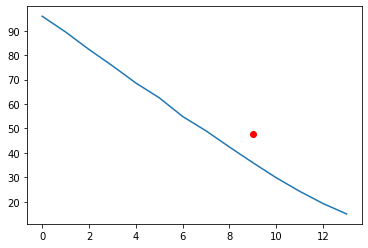

In [65]:
q = 80
int_length = int(q * p / (1 - p))

values = np.arange(q, q + int_length)
avg_costs = np.empty(int_length)
avg_overage = np.empty(int_length)
avg_underage = np.empty(int_length)

for qhat in values: 
    costs = simulate_yield_costs(q, qhat, co, cu, T, p)
    avg_costs[qhat - q] = costs[0] + costs[1]
    avg_overage[qhat - q] = costs[0]
    avg_underage[qhat - q] = costs[1]
    
optval = np.argmin(avg_costs)
opt = avg_costs[optval]

plt.scatter([optval], [opt], color = 'red')
plt.plot(np.arange(int_length), avg_costs)
plt.show()

plt.scatter([optval], [opt], color = 'red')
plt.plot(np.arange(int_length), avg_overage)
plt.show()

plt.scatter([optval], [opt], color = 'red')
plt.plot(np.arange(int_length), avg_underage)
plt.show()

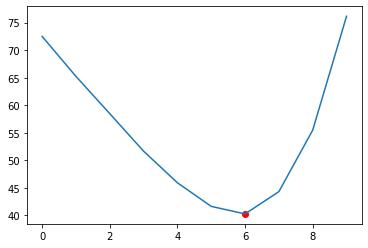

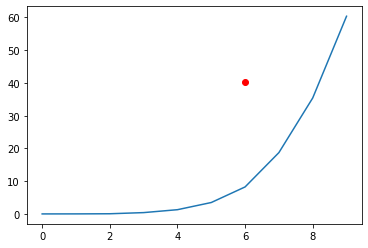

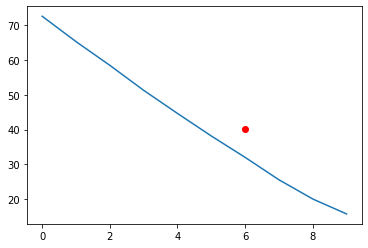

In [66]:
q = 60
int_length = int(q * p / (1 - p))

values = np.arange(q, q + int_length)
avg_costs = np.empty(int_length)
avg_overage = np.empty(int_length)
avg_underage = np.empty(int_length)

for qhat in values: 
    costs = simulate_yield_costs(q, qhat, co, cu, T, p)
    avg_costs[qhat - q] = costs[0] + costs[1]
    avg_overage[qhat - q] = costs[0]
    avg_underage[qhat - q] = costs[1]
    
optval = np.argmin(avg_costs)
opt = avg_costs[optval]

plt.scatter([optval], [opt], color = 'red')
plt.plot(np.arange(int_length), avg_costs)
plt.show()

plt.scatter([optval], [opt], color = 'red')
plt.plot(np.arange(int_length), avg_overage)
plt.show()

plt.scatter([optval], [opt], color = 'red')
plt.plot(np.arange(int_length), avg_underage)
plt.show()

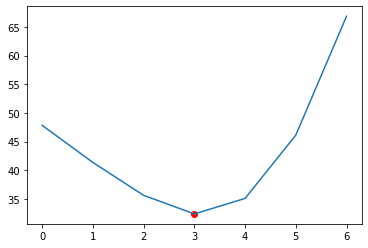

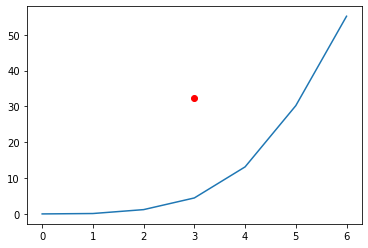

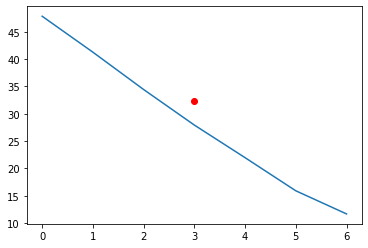

In [67]:
q = 40
int_length = int(q * p / (1 - p))

values = np.arange(q, q + int_length)
avg_costs = np.empty(int_length)
avg_overage = np.empty(int_length)
avg_underage = np.empty(int_length)

for qhat in values: 
    costs = simulate_yield_costs(q, qhat, co, cu, T, p)
    avg_costs[qhat - q] = costs[0] + costs[1]
    avg_overage[qhat - q] = costs[0]
    avg_underage[qhat - q] = costs[1]
    
optval = np.argmin(avg_costs)
opt = avg_costs[optval]

plt.scatter([optval], [opt], color = 'red')
plt.plot(np.arange(int_length), avg_costs)
plt.show()

plt.scatter([optval], [opt], color = 'red')
plt.plot(np.arange(int_length), avg_overage)
plt.show()

plt.scatter([optval], [opt], color = 'red')
plt.plot(np.arange(int_length), avg_underage)
plt.show()

# TWO SCHOOLS - SIMULATION

In [42]:
T = 1000

In [54]:
def simulate_both(cap1, cap2, offers1, offers2, co, cu, iters, prob):
    overage = 0 
    underage = 0
    for t in range(iters):
        yld1 = offers1 - np.random.binomial(offers1, prob)
        yld2 = offers2 - np.random.binomial(offers2, prob)
        if yld1 > cap1:
            overage += (yld1 - cap1) * co
        if yld1 == cap1:
            if yld2 > cap2: 
                overage += (yld2 - cap2) * co
            if yld2 < cap2: 
                underage += (cap2 - yld2) * cu
        if yld1 < cap1:
            if yld2 + yld1 <= cap2 + cap1:
                underage += cu * (cap1 + cap2 - yld1 - yld2)
            else: 
                overage += co * (yld2 + yld1 - cap1 - cap2)
            #overage += co * max(0, yld2 - cap2 + cap1 - yld1)
            #underage += cu * max(cap1 + cap2 - yld1 - yld2, 0)
    overage = overage / (iters + 1 - 1.0)
    underage = underage / (iters + 1 - 1.0)
    costs = np.array([overage, underage])
    return costs

In [55]:
def optimize_2sch(demand1, demand2, prob, iters):
    int_length1 = int(demand1 * 2 * prob  / (1 - prob))
    int_length2 = int(demand2 * 2 * prob  / (1 - prob))
    
    values1 = np.arange(demand1, demand1 + int_length1)
    values2 = np.arange(demand2, demand2 + int_length2)
    avg_costs = np.zeros(shape = (int_length1, int_length2))
    
    for qhat1 in values1: 
        for qhat2 in values2:
            #costs1 = simulate_yield_costs(demand1, qhat1, co, cu, T, p)
            #costs2 = simulate_yield_costs(demand2, qhat2, co, cu, T, p)
            costs = simulate_both(demand1, demand2, qhat1, qhat2, co, cu, iters, prob)
            avg_costs[qhat1 - demand1, qhat2 - demand2] = costs[0] + costs[1]
            #avg_costs[qhat1 - demand1, qhat2 - demand2] = costs1[0] + costs1[1] + costs2[0] + costs2[1]
            
    return avg_costs
            
    
    

In [60]:
T = 5000

q = 40

int_length = int(q * 2 * p  / (1 - p))

avg_costs = optimize_2sch(q, q, p, T)

for qhat1 in range(q, q + int_length):
    inx = np.argmin(avg_costs[qhat1 - q])
    print(str(inx) + " : " + str(avg_costs[qhat1-q, inx]))

9 : 48.272800000000004
8 : 47.900800000000004
6 : 47.5496
6 : 48.2752
5 : 52.8952
5 : 63.74
5 : 85.212
4 : 114.78320000000001
5 : 160.556
3 : 215.0128
4 : 280.7304
5 : 350.524
1 : 427.2752
4 : 506.9928


In [61]:


q = 60

int_length = int(q * 2 * p  / (1 - p))

avg_costs = optimize_2sch(q, q, p, T)

for qhat1 in range(q, q + int_length):
    inx = np.argmin(avg_costs[qhat1 - q])
    print(str(inx) + " : " + str(avg_costs[qhat1-q, inx]))

14 : 59.8656
13 : 59.7568
11 : 60.4976
11 : 59.0672
10 : 60.534400000000005
9 : 58.359199999999994
9 : 61.3664
9 : 66.36160000000001
7 : 78.5656
8 : 98.0008
8 : 124.756
8 : 160.04319999999998
6 : 206.5344
4 : 264.3984
7 : 327.616
6 : 398.3848
7 : 472.4248
6 : 547.8088
4 : 627.6824
7 : 712.4144
6 : 791.5952


In [62]:
q = 80

int_length = int(q * 2 * p  / (1 - p))

avg_costs = optimize_2sch(q, q, p, T)

for qhat1 in range(q, q + int_length):
    inx = np.argmin(avg_costs[qhat1 - q])
    print(str(inx) + " : " + str(avg_costs[qhat1-q, inx]))

21 : 68.88560000000001
19 : 68.3296
18 : 68.7544
17 : 70.0144
16 : 67.99119999999999
15 : 68.7936
15 : 68.9568
13 : 68.0032
13 : 70.0256
12 : 70.49199999999999
12 : 79.15199999999999
12 : 89.1056
10 : 105.4744
11 : 130.5072
10 : 161.92239999999998
8 : 201.5392
9 : 253.6624
7 : 310.94320000000005
11 : 371.8984
1 : 440.8264
6 : 514.5568
5 : 592.6888
10 : 672.1496
0 : 748.2095999999999
13 : 833.088
7 : 920.84
24 : 1003.6
26 : 1086.18


In [63]:
q = 100

int_length = int(q * 2 * p  / (1 - p))

avg_costs = optimize_2sch(q, q, p, T)

for qhat1 in range(q, q + int_length):
    inx = np.argmin(avg_costs[qhat1 - q])
    print(str(inx) + " : " + str(avg_costs[qhat1-q, inx]))

26 : 79.0016
25 : 78.4168
24 : 77.57759999999999
23 : 77.2936
23 : 77.25280000000001
21 : 78.49119999999999
20 : 77.7024
19 : 76.9464
19 : 75.0512
17 : 77.25040000000001
17 : 78.6584
16 : 79.71679999999999
15 : 82.0728
16 : 87.0728
15 : 98.3432
13 : 114.32639999999999
14 : 133.1192
15 : 166.2152
12 : 199.01680000000002
11 : 243.3416
15 : 297.568
13 : 354.3512
13 : 417.3544
15 : 481.544
10 : 557.8376000000001
2 : 636.3104000000001
14 : 711.3456
7 : 792.424
9 : 876.5256
18 : 952.9536
5 : 1038.5616
5 : 1126.3439999999998
4 : 1209.6391999999998
1 : 1295.3472
29 : 1373.56
